In [2]:
using ElectromagneticFields

In [3]:
using Makie

In [4]:
const a  = 1.0
const b  = 0.5
const c  = 0.5
;

In [5]:
eq = ABC(a, b, c)

ABC Equilibrium with
  A = 1.0
  B = 0.5
  C = 0.5

In [6]:
load_equilibrium(eq)

In [12]:
nx = 100
ny = 110
nz = 120
nl = 10
;

In [16]:
xgrid = LinRange(-1.0, +1.0, nx)
ygrid = LinRange(-1.0, +1.0, ny)
zgrid = LinRange(-1.0, +1.0, nz)
;

In [17]:
field = zeros(nx, ny, nz)
potAX = zeros(nx, ny, nz)
potAY = zeros(nx, ny, nz)
potAZ = zeros(nx, ny, nz)
;

In [18]:
for i in 1:nx
    for j in 1:ny
        for k in 1:nz
            field[i,j,k] = B(xgrid[i], ygrid[j], zgrid[k])
            potAX[i,j,k] = A₁(xgrid[i], ygrid[j], zgrid[k])
            potAY[i,j,k] = A₂(xgrid[i], ygrid[j], zgrid[k])
            potAZ[i,j,k] = A₃(xgrid[i], ygrid[j], zgrid[k])
        end
    end
end

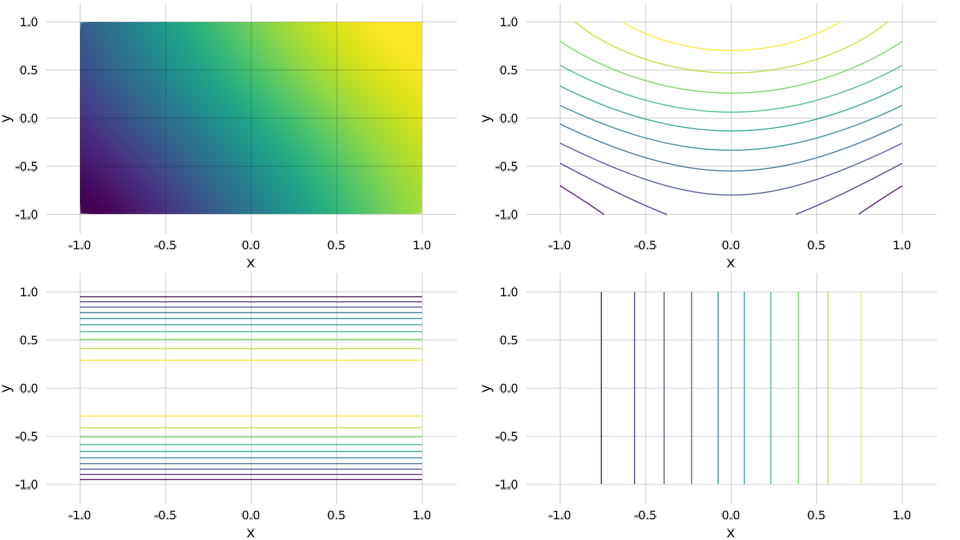

In [21]:
axis = (names = (axisnames = ("x", "y"),),)
scene = hbox(
    vbox(
        contour(xgrid, ygrid, potAX[:,:,div(nz,2)], axis=axis, levels=nl),
        contour(xgrid, ygrid, potAY[:,:,div(nz,2)], axis=axis, levels=nl)
    ),
    vbox(
        contour(xgrid, ygrid, field[:,:,div(nz,2)], axis=axis, levels=nl, linewidth=0, fillrange=true),
        contour(xgrid, ygrid, potAZ[:,:,div(nz,2)], axis=axis, levels=nl)
    )
)

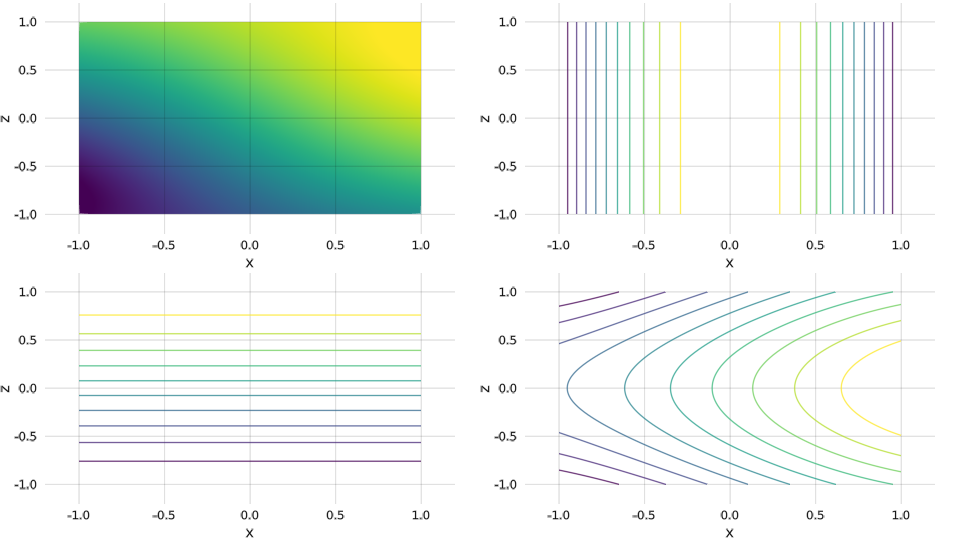

In [22]:
axis = (names = (axisnames = ("x", "z"),),)
scene = hbox(
    vbox(
        contour(xgrid, zgrid, potAX[:,div(ny,2),:], axis=axis, levels=nl),
        contour(xgrid, zgrid, potAY[:,div(ny,2),:], axis=axis, levels=nl)
    ),
    vbox(
        contour(xgrid, zgrid, field[:,div(ny,2),:], axis=axis, levels=nl, linewidth=0, fillrange=true),
        contour(xgrid, zgrid, potAZ[:,div(ny,2),:], axis=axis, levels=nl)
    )
)

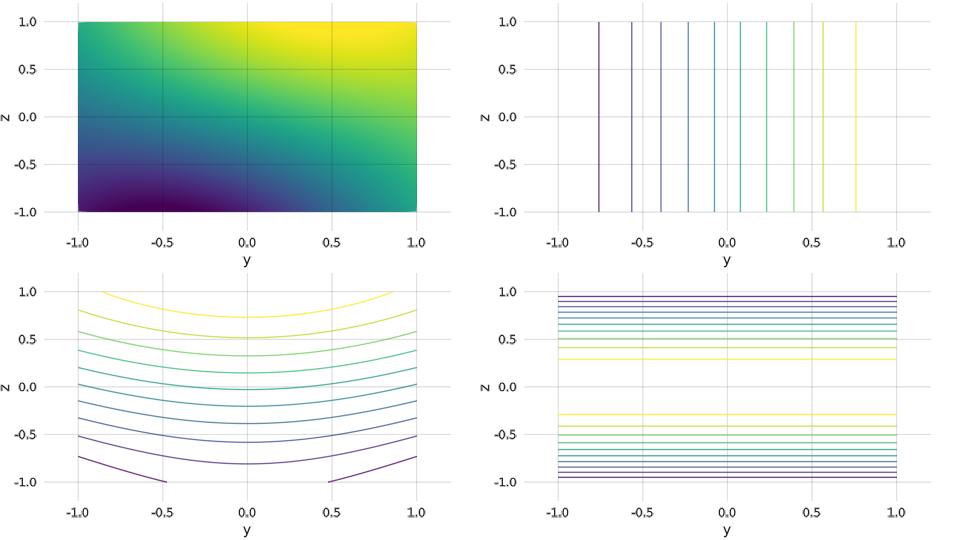

In [23]:
axis = (names = (axisnames = ("y", "z"),),)
scene = hbox(
    vbox(
        contour(ygrid, zgrid, potAX[div(nx,2),:,:], axis=axis, levels=nl),
        contour(ygrid, zgrid, potAY[div(nx,2),:,:], axis=axis, levels=nl)
    ),
    vbox(
        contour(ygrid, zgrid, field[div(nx,2),:,:], axis=axis, levels=nl, linewidth=0, fillrange=true),
        contour(ygrid, zgrid, potAZ[div(nx,2),:,:], axis=axis, levels=nl)
    )
)